#Table of Contents
* [Grab some data over the serial port from the Teensy](#Grab-some-data-over-the-serial-port-from-the-Teensy)
	* [Hmm, strange there is always a glitch at this spot](#Hmm,-strange-there-is-always-a-glitch-at-this-spot)
* [Convert values from strings to floats](#Convert-values-from-strings-to-floats)
* [Plot data - evidence of a bug](#Plot-data---evidence-of-a-bug)
* [Ok, I fixed bug in Arduino code, normalized the gain coefficients, and made the filter zero-phase (all in the Arduino code)](#Ok,-I-fixed-bug-in-Arduino-code,-normalized-the-gain-coefficients,-and-made-the-filter-zero-phase-%28all-in-the-Arduino-code%29)
* [Modify Teensy code to use a raised cosine](#Modify-Teensy-code-to-use-a-raised-cosine)
	* [Bandpass filter is not handling DC offset correctly!!](#Bandpass-filter-is-not-handling-DC-offset-correctly!!)


In [1]:
%%javascript
IPython.load_extensions('calico-document-tools');

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
from __future__ import print_function
import serial
import time

In [18]:
n_values = 2000
values = np.zeros((n_values, 2))
values.shape

(2000, 2)

# Grab some data over the serial port from the Teensy

In [19]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 9600)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()
temp

[['31', '-0.00633'],
 ['-0.81', '-0.00817'],
 ['-1.00', '-0.00689'],
 ['-0.81', '-0.00298'],
 ['-0.31', '0.00207'],
 ['0.31', '0.00633'],
 ['0.81', '0.00817'],
 ['1.00', '0.00689'],
 ['0.81', '0.00298'],
 ['0.31', '-0.00207'],
 ['-0.31', '-0.00633'],
 ['-0.81', '-0.00817'],
 ['-1.00', '-0.00689'],
 ['-0.81', '-0.00298'],
 ['-0.31', '0.00207'],
 ['0.31', '0.00633'],
 ['0.81', '0.00817'],
 ['1.00', '0.00689'],
 ['0.81', '0.00298'],
 ['0.31', '-0.00207'],
 ['-0.31', '-0.00633'],
 ['-0.81', '-0.00817'],
 ['-1.00', '-0.00689'],
 ['-0.81', '-0.00298'],
 ['-0.31', '0.00207'],
 ['0.31', '0.00633'],
 ['0.81', '0.00817'],
 ['1.00', '0.00689'],
 ['0.81', '0.00298'],
 ['0.31', '-0.00207'],
 ['-0.31', '-0.00633'],
 ['-0.81', '-0.00817'],
 ['-1.00', '-0.00689'],
 ['-0.81', '-0.00298'],
 ['-0.31', '0.00207'],
 ['0.31', '0.00633'],
 ['0.81', '0.00817'],
 ['1.00', '0.00689'],
 ['0.81', '0.00298'],
 ['0.31', '-0.00207'],
 ['-0.31', '-0.00633'],
 ['-0.81', '-0.00817'],
 ['-1.00', '-0.000.31', '-0.00207']

## Hmm, strange there is always a glitch at this spot

In [20]:
temp[40:45]

[['-0.31', '-0.00633'],
 ['-0.81', '-0.00817'],
 ['-1.00', '-0.000.31', '-0.00207'],
 ['-0.31', '-0.00633'],
 ['-0.81', '-0.00817']]

# Convert values from strings to floats

Get around glitch by just taking values after the glitch occurs.

In [23]:
for i in range(45,n_values,1):
    values[i,0] = float (temp[i][0])
    values[i,1] = float (temp[i][1])

# Plot data - evidence of a bug

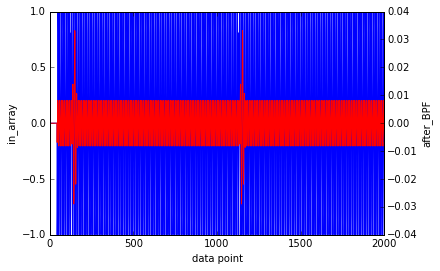

In [35]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax2.set_ylim(-0.04, 0.04)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point')

(100, 200)

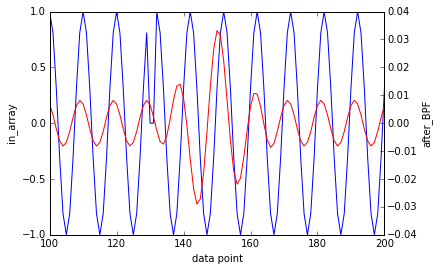

In [36]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax2.set_ylim(-0.04, 0.04)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point')
ax.set_xlim(100,200)

(1100, 1200)

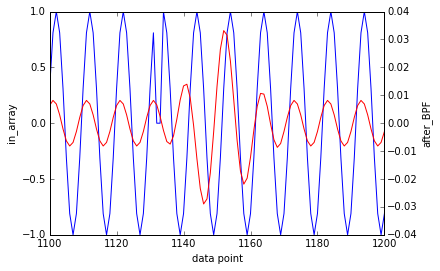

In [37]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax2.set_ylim(-0.04, 0.04)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point')
ax.set_xlim(1100,1200)

# Ok, I fixed bug in Arduino code, normalized the gain coefficients, and made the filter zero-phase (all in the Arduino code)

In [83]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 9600)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()
temp

[['-0.37221'],
 ['0.31', '0.25789'],
 ['0.81', '0.78949'],
 ['1.00', '1.01953'],
 ['0.81', '0.86014'],
 ['0.31', '0.37221'],
 ['-0.31', '-0.25789'],
 ['-0.81', '-0.78949'],
 ['-1.00', '-1.01953'],
 ['-0.81', '-0.86014'],
 ['-0.31', '-0.37221'],
 ['0.31', '0.25789'],
 ['0.81', '0.78949'],
 ['1.00', '1.01953'],
 ['0.81', '0.86014'],
 ['0.31', '0.37221'],
 ['-0.31', '-0.25789'],
 ['-0.81', '-0.78949'],
 ['-1.00', '-1.01953'],
 ['-0.81', '-0.86014'],
 ['-0.31', '-0.37221'],
 ['0.31', '0.25789'],
 ['0.81', '0.78949'],
 ['1.00', '1.01953'],
 ['0.81', '0.86014'],
 ['0.31', '0.37221'],
 ['-0.31', '-0.25789'],
 ['-0.81', '-0.78949'],
 ['-1.00', '-1.01953'],
 ['-0.81', '-0.86014'],
 ['-0.31', '-0.37221'],
 ['0.31', '0.25789'],
 ['0.81', '0.78949'],
 ['1.00', '1.01953'],
 ['0.81', '0.86014'],
 ['0.31', '0.37221'],
 ['-0.31', '-0.25789'],
 ['-0.81', '-0.78949'],
 ['-1.00', '-1.01953'],
 ['-0.81', '-0.86014'],
 ['-0.31', '-0.37221'],
 ['0.31', '0.25789'],
 ['0.81', '0.78949'],
 ['1.-0.81', '-0.7894

In [84]:
temp[40:45]

[['-0.31', '-0.37221'],
 ['0.31', '0.25789'],
 ['0.81', '0.78949'],
 ['1.-0.81', '-0.78949'],
 ['-1.00', '-1.01953']]

In [85]:
for i in range(45,n_values,1):
    values[i,0] = float (temp[i][0])
    values[i,1] = float (temp[i][1])

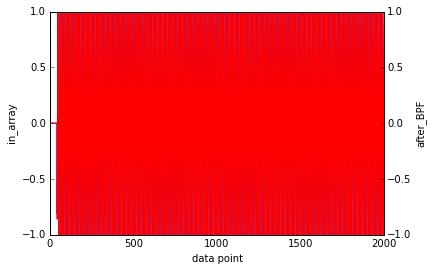

In [86]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax2.set_ylim(-1, 1)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point')

(40, 100)

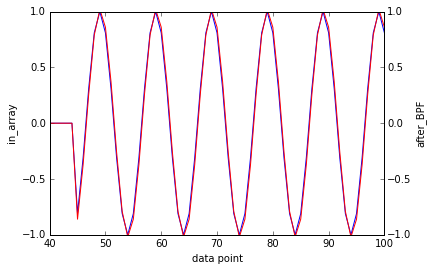

In [87]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax2.set_ylim(-1, 1)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point')
ax.set_xlim(40,100)

# Modify Teensy code to use a raised cosine

In [98]:
teensy = serial.Serial('/dev/cu.usbmodem213141', 9600)
temp = []
for i in range(n_values):
    if i == 0:
        teensy.flushInput()
    temp.append( teensy.readline().strip().split(',') )

teensy.close()
temp

[['.77795'],
 ['0.19', '1.24635'],
 ['0.00', '1.01632'],
 ['0.19', '1.17570'],
 ['0.69', '1.66364'],
 ['1.31', '2.29374'],
 ['1.81', '2.82534'],
 ['2.00', '3.05538'],
 ['1.81', '2.89599'],
 ['1.31', '2.40806'],
 ['0.69', '1.77795'],
 ['0.19', '1.24635'],
 ['0.00', '1.01632'],
 ['0.19', '1.17570'],
 ['0.69', '1.66364'],
 ['1.31', '2.29374'],
 ['1.81', '2.82534'],
 ['2.00', '3.05538'],
 ['1.81', '2.89599'],
 ['1.31', '2.40806'],
 ['0.69', '1.77795'],
 ['0.19', '1.24635'],
 ['0.00', '1.01632'],
 ['0.19', '1.17570'],
 ['0.69', '1.66364'],
 ['1.31', '2.29374'],
 ['1.81', '2.82534'],
 ['2.00', '3.05538'],
 ['1.81', '2.89599'],
 ['1.31', '2.40806'],
 ['0.69', '1.77795'],
 ['0.19', '1.24635'],
 ['0.00', '1.01632'],
 ['0.19', '1.17570'],
 ['0.69', '1.66364'],
 ['1.31', '2.29374'],
 ['1.81', '2.82534'],
 ['2.00', '3.05538'],
 ['1.81', '2.89599'],
 ['1.31', '2.40806'],
 ['0.69', '1.77795'],
 ['0.19', '1.24635'],
 ['0.00', '1.01632'],
 ['0.19', '1.17570'],
 ['0.69', '1.66364'],
 ['1.31', '2.29374'

In [99]:
temp[40:50]

[['0.69', '1.77795'],
 ['0.19', '1.24635'],
 ['0.00', '1.01632'],
 ['0.19', '1.17570'],
 ['0.69', '1.66364'],
 ['1.31', '2.29374'],
 ['1.1.81', '2.89599'],
 ['1.31', '2.40806'],
 ['0.69', '1.77795'],
 ['0.19', '1.24635']]

In [100]:
for i in range(50,n_values,1):
    values[i,0] = float (temp[i][0])
    values[i,1] = float (temp[i][1])

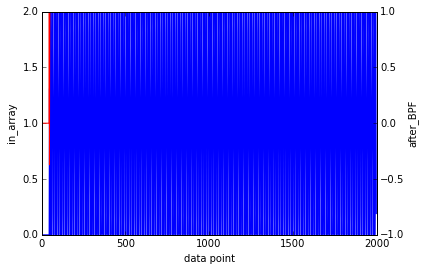

In [101]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
ax2.set_ylim(-1, 1)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point')

(940, 1000)

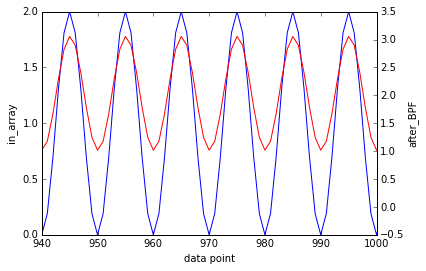

In [103]:
fig, ax = plt.subplots()
ax.plot(range(n_values), values[:,0])
ax2 = ax.twinx()
ax2.plot(range(n_values), values[:,1], 'r')
#ax2.set_ylim(-1, 1)
ax.set_ylabel('in_array')
ax2.set_ylabel('after_BPF')
ax.set_xlabel('data point')
ax.set_xlim(940,1000)

## Bandpass filter is not handling DC offset correctly!!